In [3]:
import csv
import pandas as pd
import numpy as np
import json
csv.field_size_limit(100000000)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.dates as mdates
import matplotlib.ticker as tick
pd.options.display.float_format = '{:.4f}'.format

In [4]:
#Labels und Pfad 
TweetsCov19_labels = ['Tweet_Id', 'Timestamp', 'Is_deleted','Sentistrengh_pos', 'Sentistrengh_neg', 'Sentistrengh_average']
TweetsCov19_Pfad =  '../data/tweetscov19_sentiment_analysis_sentistrength.tsv'

In [5]:
#Stichprobe von Tweetscov19-Stichprobe lesen

df_tweetscov19 = pd.read_csv(TweetsCov19_Pfad, sep='\t', error_bad_lines=False, names=TweetsCov19_labels)
print('Form:', df_tweetscov19.shape)
df_tweetscov19.head()

Form: (9409841, 6)


,Tweet_Id,Timestamp,Is_deleted,Sentistrengh_pos,Sentistrengh_neg,Sentistrengh_average
0,1178791637348212736,2019-09-30 22:00:01+00:00,True,1,-1,0
1,1178791641601232896,2019-09-30 22:00:02+00:00,False,1,-1,0
2,1178791643509612547,2019-09-30 22:00:03+00:00,False,1,-2,-1
3,1178791644214235137,2019-09-30 22:00:03+00:00,False,3,-1,2
4,1178791645371875329,2019-09-30 22:00:03+00:00,False,4,-1,3


In [6]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['Is_deleted'] == True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['Is_deleted'] == False]

In [7]:
#Die drei Wertungen für die Stimmung, also negativ, positiv und Mittelwert von den gelöschten Tweets mit den nicht gelöschten Tweets vergleichen. 
#Englische Labels

def Sentiment_analysis_negativ_positiv_sentistrength(covid19tweets_del, covid19tweets_undel, titel):
    df_del = covid19tweets_del
    df_undel = covid19tweets_undel

    df_del = df_del.reset_index()
    df_undel = df_undel.reset_index()
    
    df_del['Sentistrengh_neg']= df_del['Sentistrengh_neg'].astype(float) 
    df_undel['Sentistrengh_neg']= df_undel['Sentistrengh_neg'].astype(float) 
    
    df_del['Sentistrengh_pos']= df_del['Sentistrengh_pos'].astype(float) 
    df_undel['Sentistrengh_pos']= df_undel['Sentistrengh_pos'].astype(float) 

    df_del['Sentistrengh_average']= df_del['Sentistrengh_average'].astype(float) 
    df_undel['Sentistrengh_average']= df_undel['Sentistrengh_average'].astype(float) 
    
    df_del.Timestamp = pd.to_datetime(df_del.Timestamp)
    df_del.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_del.index = df_del.Timestamp
  
    print('Number of deleted tweets: ', df_del['Tweet_Id'].size)
    g = df_del.groupby(pd.DatetimeIndex(df_del['Timestamp']).normalize())
    df_del  = g.mean()
    
     
    
    df_undel.Timestamp = pd.to_datetime(df_undel.Timestamp)
    df_undel.sort_values(by = ['Timestamp'], inplace=True, ascending = True)
    df_undel.index = df_undel.Timestamp
    print('Number of non-deleted tweets: ', df_undel['Tweet_Id'].size)

    g = df_undel.groupby(pd.DatetimeIndex(df_undel['Timestamp']).normalize())
    df_undel  = g.mean()
    
    df_del.rename(columns = {'Sentistrengh_neg' : 'Deleted Tweets(negative)'}, inplace = True)
    df_del.rename(columns = {'Sentistrengh_pos' : 'Deleted Tweets(positive)'}, inplace = True)
    df_del.rename(columns = {'Sentistrengh_average' : 'Deleted Tweets(average)'}, inplace = True)

    df_undel.rename(columns = {'Sentistrengh_neg' : 'Non-Deleted Tweets(negative)'}, inplace = True)
    df_undel.rename(columns = {'Sentistrengh_pos' : 'Non-Deleted Tweets(positive)'}, inplace = True)
    df_undel.rename(columns = {'Sentistrengh_average' : 'Non-Deleted Tweets(average)'}, inplace = True)
    
    fig, ax = plt.subplots()
    df_del.plot(y=['Deleted Tweets(negative)'], figsize=(15,6), color = 'crimson', ax = ax)
    df_del.plot(y=['Deleted Tweets(positive)'], color = 'darkgreen', ax = ax)
    df_del.plot(y=['Deleted Tweets(average)'], color = 'mediumblue', ax = ax)

    df_undel.plot(y=['Non-Deleted Tweets(negative)'],style = '--' , color = 'crimson', ax = ax)
    df_undel.plot(y=['Non-Deleted Tweets(positive)'],style = '--' , color = 'darkgreen', ax = ax)
    df_undel.plot(y=['Non-Deleted Tweets(average)'],style = '--' , color = 'mediumblue', ax = ax)
    
    ax.set_xlabel('', fontsize = 16)
    ax.xaxis.set_major_locator(mdates.MonthLocator())

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    #ax.tick_params(axis='y', which='major', labelsize=16)
    #ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)
    plt.xticks(fontsize=18, rotation=45, ha='center')
    #ax.set_xticklabels(rotation='45')
    
    ax.set_ylim([-2, 2])
    ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.2f'))
    ax.set_ylabel('Sentiment', fontsize = 22)
    plt.gca().legend(loc='lower center', ncol = 2, fontsize=19, bbox_to_anchor=(0.5, -0.6))

    #plt.figure(figsize=(8,6))
    #plt.tight_layout()

    plt.savefig('../plots/'+titel+'.pdf', bbox_inches = 'tight')
    fig.show()

Number of deleted tweets:  2137501
Number of non-deleted tweets:  7272340


<ipython-input-7-b118065dd9be>:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


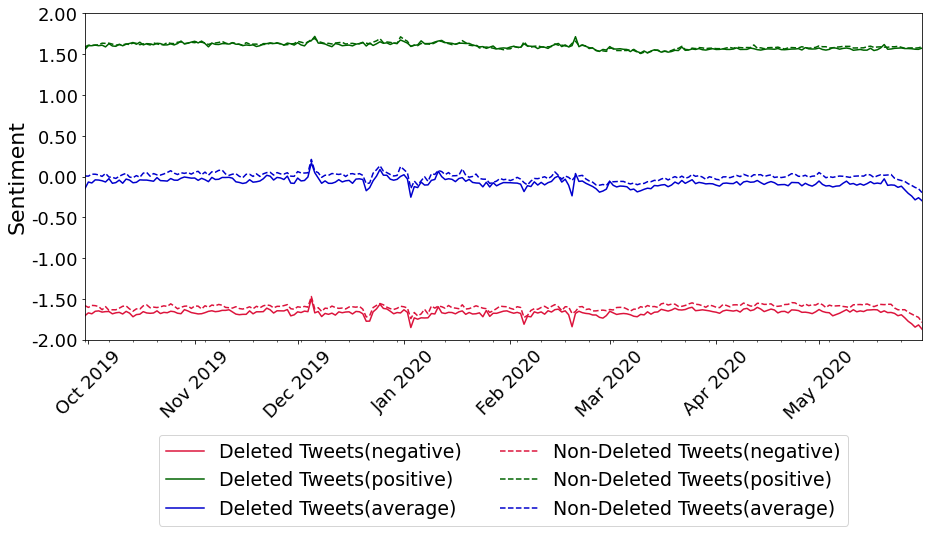

In [8]:
Sentiment_analysis_negativ_positiv_sentistrength(df_tweetscov19_del, df_tweetscov19_undel, 'Stimmungsanalyse_sentistrength_tweetCOV19')